<a href="https://colab.research.google.com/github/pacogp/TFM/blob/main/Evaluaci%C3%B3n_Despliegue_TFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Inicialmente importamos las librería y módulos que vamos a necesitar
import pandas as pd
import io 
from google.colab import files

# para manipulación de datos y representaciones visuales vamos a necesitsar importar lo siguiente
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns

In [10]:
# para la importación de los datos: definimos la función upload_files

def upload_files ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
    return df

In [11]:
# Cargamos los datos del dataset resultante del la exploración de los datos "datos_completos_dedupped_train_test.csv", Enlace: https://github.com/pacogp/TFM

datos = upload_files()
datos.head()

Saving datos_completos_dedupped_train_test_.csv to datos_completos_dedupped_train_test_.csv
User uploaded file "datos_completos_dedupped_train_test_.csv" with length 2205420 bytes


,CLIENTE,MODELO,NUM_PLAZAS,MECANISMO_MODULO,IMPORTE_LINEA,CATEGORIA,TIPO_TAPICERIA,COSTE_TAPIZADO_AGRUP,P_COSTE,MARGEN_UDS_LINEA,DTO_FAMILIA,I_COMISION,I_BRUTO,DTO_PP,DTO_LINEAS,MARGEN_BRUTO,PROVINCIA,COD_COMUNIDAD,HIPOTECA,INDENCIAS_CLIENTE,PIB_VALOR_EUROS,PARO_2020T3,status_cliente
0,386,0,300,0,592.02,0,T,90.13,154.01,347.88,8.0,67.73,1472.46,0.00,117.80,1354.66,8,9.0,0.3240,89.0,29885.0,11.40,9.534693
1,386,0,100,1,470.58,0,T,90.13,127.43,253.02,8.0,67.73,1472.46,0.00,117.80,1354.66,8,9.0,0.3240,89.0,29885.0,11.40,9.534693
2,386,0,100,0,409.86,0,T,90.13,110.43,209.30,8.0,67.73,1472.46,0.00,117.80,1354.66,8,9.0,0.3240,89.0,29885.0,11.40,9.534693
3,4951,1,100,2,266.34,0,T,43.19,53.02,170.13,16.0,0.00,1305.48,21.93,208.86,1074.70,7,4.0,0.4149,53.0,27134.0,11.18,10.505733
4,4951,1,100,2,422.28,0,T,86.39,36.05,263.79,16.0,0.00,1305.48,21.93,208.86,1074.70,7,4.0,0.4149,53.0,27134.0,11.18,10.505733


### Separación del atributo de clase y las columnas a utilizar del dataset

In [12]:
labels = datos.TIPO_TAPICERIA.values

features = datos[['CLIENTE', 'I_BRUTO', 'MARGEN_BRUTO', 'PIB_VALOR_EUROS', 
                 'DTO_LINEAS', 'IMPORTE_LINEA', 'status_cliente', 
                 'MARGEN_UDS_LINEA', 'I_COMISION', 'DTO_PP', 'CATEGORIA']]

In [13]:
print(f"Vista de los datos del atributo target: \n{labels}")
print("-"*50)
print("Vista parcial de los datos sin el atributo target:")
features.head()

Vista de los datos del atributo target: 
['T' 'T' 'T' ... 'T' 'T' 'T']
--------------------------------------------------
Vista parcial de los datos sin el atributo target:


,CLIENTE,I_BRUTO,MARGEN_BRUTO,PIB_VALOR_EUROS,DTO_LINEAS,IMPORTE_LINEA,status_cliente,MARGEN_UDS_LINEA,I_COMISION,DTO_PP,CATEGORIA
0,386,1472.46,1354.66,29885.0,117.80,592.02,9.534693,347.88,67.73,0.00,0
1,386,1472.46,1354.66,29885.0,117.80,470.58,9.534693,253.02,67.73,0.00,0
2,386,1472.46,1354.66,29885.0,117.80,409.86,9.534693,209.30,67.73,0.00,0
3,4951,1305.48,1074.70,27134.0,208.86,266.34,10.505733,170.13,0.00,21.93,0
4,4951,1305.48,1074.70,27134.0,208.86,422.28,10.505733,263.79,0.00,21.93,0


In [14]:
# Comprobamos que efectivamente no existen nulos

nulos_x_columna = features.isna().sum()

print(f"Cantidad de filas que tienen valores nulos por atributo:\n{nulos_x_columna}")

Cantidad de filas que tienen valores nulos por atributo:
CLIENTE             0
I_BRUTO             0
MARGEN_BRUTO        0
PIB_VALOR_EUROS     0
DTO_LINEAS          0
IMPORTE_LINEA       0
status_cliente      0
MARGEN_UDS_LINEA    0
I_COMISION          0
DTO_PP              0
CATEGORIA           0
dtype: int64


### Generación de los datasets de entrenamiento y testing

In [15]:
from sklearn.model_selection import train_test_split

# Se reparten los datos disponibles en conjuntos para entrenamiento y testeo

# train_data, test_data, train_labels, test_labels = train_test_split(data, labels) 

train_data, test_data, train_labels, test_labels = train_test_split(features, labels, test_size = 0.20) # 20% de datos para test, 80% para entrenamiento
# Toma por defecto 75% (entrenamiento) - 25% (testeo)
# Se podría modificar con el parámetro test_size = 0.## y el complemento para training

In [16]:
# Vista de los datos de entrenamiento para una fila

print(f"Un registro de entrenamiento: \n{train_data.iloc[1]}")
print("-"*50)
print(f"Label del registro: \n{train_labels[1]}")

Un registro de entrenamiento: 
CLIENTE              9314.000000
I_BRUTO              1541.400000
MARGEN_BRUTO         1340.500000
PIB_VALOR_EUROS     25482.000000
DTO_LINEAS            133.430000
IMPORTE_LINEA         380.800000
status_cliente          9.734669
MARGEN_UDS_LINEA      163.600000
I_COMISION             67.030000
DTO_PP                 67.460000
CATEGORIA               0.000000
Name: 12348, dtype: float64
--------------------------------------------------
Label del registro: 
T


In [17]:
# Vista de los datos de testeo para una fila

print(f"Un registro de testeo: \n{test_data.iloc[1]}")
print("-"*50)
print(f"Label del registro: \n{test_labels[1]}")

Un registro de testeo: 
CLIENTE              8838.000000
I_BRUTO               798.000000
MARGEN_BRUTO          798.000000
PIB_VALOR_EUROS     17465.000000
DTO_LINEAS              0.000000
IMPORTE_LINEA         350.000000
status_cliente         12.918704
MARGEN_UDS_LINEA      205.390000
I_COMISION             39.900000
DTO_PP                  0.000000
CATEGORIA               2.000000
Name: 2957, dtype: float64
--------------------------------------------------
Label del registro: 
T


### Aplicación de técnicas para extracción de patrones

In [18]:
#Importaciones varias para la evaluación

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import plot_confusion_matrix

# Configuración de la evaluación

def evaluar_modelo(modelo, test_data, test_labels):
    prediction = modelo.predict(test_data)
    print('Rendimiento obtenido:',accuracy_score(test_labels,prediction))
    print('Reporte de indicadores:\n',classification_report(test_labels,prediction))
    print('Matriz de confusión:')
    cf = plot_confusion_matrix(modelo,test_data,test_labels,cmap='Blues_r',values_format='d')

#### ZeroR

In [19]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier('most_frequent') # predictores posibles “stratified”, “most_frequent”, “prior”, “uniform”, “constant”}, default=”prior”
clf.fit(train_data, train_labels)

prediction = clf.predict(test_data)
print('Rendimiento obtenido:',accuracy_score(test_labels, prediction))
print('Vista de una muestra de valores de predicción y datos de testeo:')
print(prediction[:10])
print(test_labels[:10])

Rendimiento obtenido: 0.9052941176470588
Vista de una muestra de valores de predicción y datos de testeo:
['T' 'T' 'T' 'T' 'T' 'T' 'T' 'T' 'T' 'T']
['T' 'T' 'T' 'T' 'T' 'T' 'T' 'T' 'T' 'T']


#### Regresión Logística

In [21]:
# Prueba Nro.1

lreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
               intercept_scaling=1, l1_ratio=None, max_iter=75,
               multi_class='multinomial', n_jobs=None, penalty='l2',
               random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
               warm_start=False) 

lreg.fit(train_data, train_labels)

# multi_class {'auto', 'ovr', 'multinomial'}, predeterminado = 'auto'
# solver = 'newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’ 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=75,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
from sklearn.linear_model import LogisticRegression

# Prueba Nro. 2

lreg2 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                intercept_scaling=1, l1_ratio=None, max_iter=100,
                multi_class='auto', n_jobs=None, penalty='l2',
                random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                warm_start=False)
lreg2.fit(train_data, train_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Rendimiento obtenido: 0.9802941176470589
Reporte de indicadores:
               precision    recall  f1-score   support

           P       0.89      0.90      0.90       322
           T       0.99      0.99      0.99      3078

    accuracy                           0.98      3400
   macro avg       0.94      0.94      0.94      3400
weighted avg       0.98      0.98      0.98      3400

Matriz de confusión:


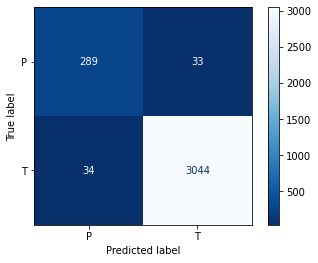

In [22]:
#Prueba Nro. 1
evaluar_modelo(lreg, test_data, test_labels)

Rendimiento obtenido: 0.9305882352941176
Reporte de indicadores:
               precision    recall  f1-score   support

           P       0.82      0.34      0.48       322
           T       0.94      0.99      0.96      3078

    accuracy                           0.93      3400
   macro avg       0.88      0.67      0.72      3400
weighted avg       0.92      0.93      0.92      3400

Matriz de confusión:


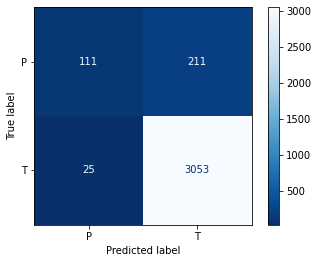

In [23]:
#Prueba Nro. 2
evaluar_modelo(lreg2, test_data, test_labels)

#### KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

# knn = KNeighborsClassifier(n_neighbors=25, algorithm = 'ball_tree', metric = 'euclidean') # mejora con 25, defecto 50

# algorithm = ‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
# metric = “euclidean”, “manhattan”, “minkowski”,“mahalanobis”, “chebyshev”

knn.fit(train_data, train_labels)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

Rendimiento obtenido: 0.9185294117647059
Reporte de indicadores:
               precision    recall  f1-score   support

           P       0.70      0.24      0.36       322
           T       0.93      0.99      0.96      3078

    accuracy                           0.92      3400
   macro avg       0.81      0.62      0.66      3400
weighted avg       0.90      0.92      0.90      3400

Matriz de confusión:


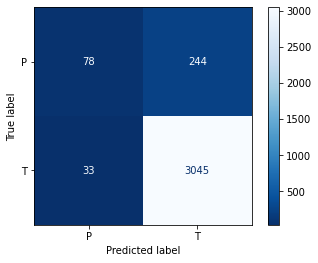

In [25]:
evaluar_modelo(knn, test_data, test_labels)

#### ARBOLES DE DECISION

In [26]:
from sklearn.tree import DecisionTreeClassifier

# Prueba Nro. 1
dtc = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                     max_depth=5, max_features=None, max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=5,
                     min_weight_fraction_leaf=0.0, presort='deprecated',
                     random_state=None, splitter='best')

dtc.fit(train_data, train_labels)

# criterion{“gini”, “entropy”}, default=”gini”


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [27]:
# Prueba Nro. 2

dtc2 = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

dtc2.fit(train_data, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Rendimiento obtenido: 1.0
Reporte de indicadores:
               precision    recall  f1-score   support

           P       1.00      1.00      1.00       322
           T       1.00      1.00      1.00      3078

    accuracy                           1.00      3400
   macro avg       1.00      1.00      1.00      3400
weighted avg       1.00      1.00      1.00      3400

Matriz de confusión:


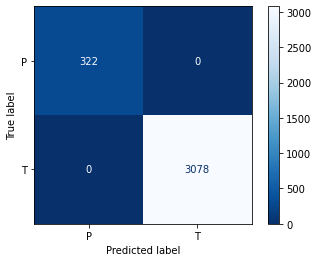

In [28]:
# Prueba Nro. 1
evaluar_modelo(dtc, test_data, test_labels)

Rendimiento obtenido: 1.0
Reporte de indicadores:
               precision    recall  f1-score   support

           P       1.00      1.00      1.00       322
           T       1.00      1.00      1.00      3078

    accuracy                           1.00      3400
   macro avg       1.00      1.00      1.00      3400
weighted avg       1.00      1.00      1.00      3400

Matriz de confusión:


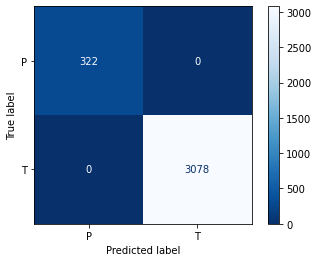

In [29]:
# Prueba Nro. 2
evaluar_modelo(dtc2, test_data, test_labels)

### Métodos de ensamblado de modelos: RandomForest

In [40]:
from sklearn.ensemble import RandomForestClassifier


#prueba #1

rndf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

rndf.fit(train_data, train_labels)

#max_features {"auto", "sqrt", "log2"}, int o float, predeterminado = "auto"




RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
#prueba #2

rndf2 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rndf2.fit(train_data, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Rendimiento obtenido: 0.9991176470588236
Reporte de indicadores:
               precision    recall  f1-score   support

           P       0.99      1.00      1.00       322
           T       1.00      1.00      1.00      3078

    accuracy                           1.00      3400
   macro avg       1.00      1.00      1.00      3400
weighted avg       1.00      1.00      1.00      3400

Matriz de confusión:


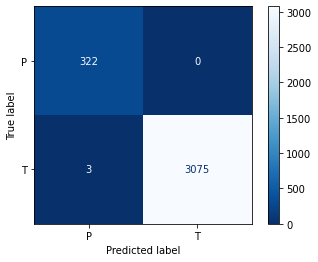

In [42]:
# Prueba #1

evaluar_modelo(rndf, test_data, test_labels)

Rendimiento obtenido: 1.0
Reporte de indicadores:
               precision    recall  f1-score   support

           P       1.00      1.00      1.00       322
           T       1.00      1.00      1.00      3078

    accuracy                           1.00      3400
   macro avg       1.00      1.00      1.00      3400
weighted avg       1.00      1.00      1.00      3400

Matriz de confusión:


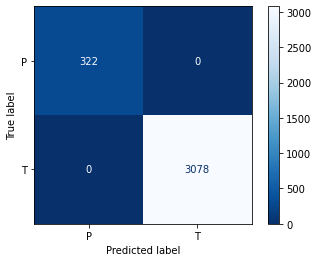

In [43]:
# Prueba #2

evaluar_modelo(rndf2, test_data, test_labels)